<a href="https://colab.research.google.com/github/mazibazi/dataScienceGeo/blob/main/dataPreprocesingSPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import file and Lib

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pandas-profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
from pandas_profiling import ProfileReport

In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/datasetSelectedLine4SoilPro.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
0,0,S1_TI-2C,2.0,2.6,Filling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Av. Reina Mercedes,37.36079,-5.988427
1,1,S1_TI-2C,9.0,9.6,Clay,1.818,NaN,0.49,23.0,NaN,NaN,0.49,23.00,20.0,Av. Reina Mercedes,37.36079,-5.988427
2,2,S1_TI-2C,23.5,24.1,Sand,2.006,2.35,NaN,NaN,0.20,30.31,0.20,30.31,31.0,Av. Reina Mercedes,37.36079,-5.988427
3,3,S1_TI-2C,29.5,30.1,Sand,2.050,NaN,0.47,23.5,NaN,NaN,0.47,23.50,NaN,Av. Reina Mercedes,37.36079,-5.988427
4,4,S1_TI-2C,40.0,40.6,Marl,2.102,NaN,NaN,NaN,0.44,20.10,0.44,20.10,NaN,Av. Reina Mercedes,37.36079,-5.988427


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.shape[0]

133

# Dataset shape and Number of Soil

We can see for each section of Seville, Soil layer we have data

In [ ]:
targetSoil = ["Clay", "Sand"]
gravelSoil = {"Gravel"}
deepSoil = ["Marl"]
fillSoil = ["Filling"]

In [ ]:
df1 = df[df["Soil"].isin(targetSoil)]
df2 = df[df["Soil"].isin(gravelSoil)]
df3 = df[df["Soil"].isin(deepSoil)]
df0 = df[df["Soil"].isin(fillSoil)]
print(f"Number of report that are located in \nfilling: {df0.shape[0]}\nClay and Sand: {df1.shape[0]}\nGravel: {df2.shape[0]} \nMarl: {df3.shape[0]}")

Number of report that are located in 
filling: 18
Clay and Sand: 55
Gravel: 15 
Marl: 41


## Number of Null data

**Percentage of Null SPT for Sand and Clay**

In [ ]:
round(sum(df1["Nspt"].isna())/df1.shape[0]*100,2)

41.82

In [ ]:
round(sum(df1["Cu"].isna())/df1.shape[0]*100,2)

47.27

**Finding a data which we do not have "Nspt" and "Soil Lab Report"**
Therefore, we can say this data are not useful

In [ ]:
print(round(sum(df1["Nspt"].isnull() & df1["Cu"].isnull())/df1.shape[0]*100,2))
print(sum(df1["Nspt"].isnull() & df1["Cu"].isnull()))

14.55
8


As we can see this data are not usable for us, however later we have to take a look at the location of them too. 

In [ ]:
dataNullReport = df1[df1["Nspt"].isnull() & df1["Cu"].isnull()]
dataNullReport

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
43,S4_TVI-1,4.0,4.6,Clay,0.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/ Americo Vespucio,37.398565,-6.010093
66,S1_TVIII-1,8.0,8.6,Sand,1.868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/ Antonio Bienvenida (Feria),37.369618,-5.997485
81,S3_TVIII-1,14.0,14.6,Clay,1.888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puerto de Sevilla,37.364774,-5.994372
94,S8_TVII-2,16.0,16.6,Sand,2.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ronda Triana,37.381862,-6.009896
100,S2_TV-2,4.0,4.6,Clay,1.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Av. Alvaro Alonso,37.409252,-5.994999
109,S3_TV-2,7.0,7.6,Sand,2.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/ J. Bautista Muñoz,37.409546,-5.996847
117,S9_TVII-2,10.0,10.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/ Santa Fe,37.375627,-6.005359
121,S10_TVII-2,10.0,10.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lopez de Gomara,37.380210,-6.008791


In [ ]:
dataNullReport["Code"]

43       S4_TVI-1
66     S1_TVIII-1
81     S3_TVIII-1
94      S8_TVII-2
100       S2_TV-2
109       S3_TV-2
117     S9_TVII-2
121    S10_TVII-2
Name: Code, dtype: object

In [ ]:
df[df["Code"].isin(dataNullReport["Code"])]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
42,S4_TVI-1,NaN,NaN,Filling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/ Americo Vespucio,37.398565,-6.010093
43,S4_TVI-1,4.0,4.6,Clay,0.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/ Americo Vespucio,37.398565,-6.010093
44,S4_TVI-1,10.0,10.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,C/ Americo Vespucio,37.398565,-6.010093
45,S4_TVI-1,18.0,18.6,Gravel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,C/ Americo Vespucio,37.398565,-6.010093
65,S1_TVIII-1,4.5,5.1,NaN,1.816,NaN,0.25,25.24,NaN,NaN,0.25,25.24,NaN,C/ Antonio Bienvenida (Feria),37.369618,-5.997485
66,S1_TVIII-1,8.0,8.6,Sand,1.868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/ Antonio Bienvenida (Feria),37.369618,-5.997485
67,S1_TVIII-1,12.1,12.7,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,C/ Antonio Bienvenida (Feria),37.369618,-5.997485
68,S1_TVIII-1,19.5,20.1,Sand,1.993,NaN,NaN,NaN,0.52,17.89,0.52,17.89,27.0,C/ Antonio Bienvenida (Feria),37.369618,-5.997485
69,S1_TVIII-1,24.0,24.4,Marl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/ Antonio Bienvenida (Feria),37.369618,-5.997485
70,S1_TVIII-1,31.5,32.1,Marl,2.083,NaN,0.46,23.21,NaN,NaN,0.46,23.21,NaN,C/ Antonio Bienvenida (Feria),37.369618,-5.997485


**S4_TVI-1** reported Sand, and Gravel<br>
**S1_TVIII-1** reported filling and Sand<br>
**S3_TVIII-1** reported Gravel and Marl<br>
**S8_TVII-2** just not reported one layer Sand of two layer <br>
**S2_TV-2** has reported some other layers same as 	S8_TVII-2<br>
**S3_TV-2** and **S9_TVII-2** one Sand layer is reported<br>
**S10_TVII-2** Nspt in one Sand and Soil pro in Marl is reported <br>

*So These Raws are not useful, but they have same SPT reports which is usefull for other layers or they have two reports for sand and caly and the other one is complete.<br> Therefore, we can remove these data, but it does not impact on other.*

**Percentage of complete data**<br> which we have Nspt and Soil Lab report, and they are complete data, so we can use this data.

In [ ]:
print(round(sum(df1["Nspt"].notnull() & df1["Cu"].notnull())/df1.shape[0]*100,2))
print(sum(df1["Nspt"].notnull() & df1["Cu"].notnull()))

25.45
14


In [ ]:
dfComplete= df1[df1["Nspt"].notnull() & df1["Cu"].notnull()]
dfComplete.head(3)

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
1,S1_TI-2C,9.0,9.6,Clay,1.818,NaN,0.49,23.0,NaN,NaN,0.49,23.00,20.0,Av. Reina Mercedes,37.36079,-5.988427
2,S1_TI-2C,23.5,24.1,Sand,2.006,2.35,NaN,NaN,0.20,30.31,0.20,30.31,31.0,Av. Reina Mercedes,37.36079,-5.988427
6,S1_TVII-2,7.2,7.8,Clay,2.156,NaN,NaN,NaN,0.18,23.64,0.18,23.64,10.0,C/ Odiel,37.39085,-6.010817


**One of The SPT or Soil Lab Reports is missed**<br>
But we can predict These Values from other reports or by using the some equation.<br>
This section is expanded in **dealingWithNull.ipynb**

In [ ]:
print(round(sum(df1["Nspt"].isnull() | df1["Cu"].isnull())/df1.shape[0]*100,2))
print(sum(df1["Nspt"].isnull() | df1["Cu"].isnull()))

74.55
41


In [ ]:
dfMiss = df1[df1["Nspt"].isnull() | df1["Cu"].isnull()]
dfMiss.head(2)

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
3,S1_TI-2C,29.5,30.1,Sand,2.050,NaN,0.47,23.50,NaN,NaN,0.47,23.50,NaN,Av. Reina Mercedes,37.36079,-5.988427
7,S1_TVII-2,9.7,10.3,Clay,2.063,NaN,0.52,23.14,NaN,NaN,0.52,23.14,NaN,C/ Odiel,37.39085,-6.010817


## Check the depth of Tunnel

**Tunnels would be excavated in Sand or Clay**<br>
So At first I am going to check the tunnel depth, and we can see in these point tunnel would be located in Sand and Caly.<br>
For both Condition of Missing data and complete data is checked

In [ ]:
dfComplete[dfComplete["DepthDown"]>15]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
2,S1_TI-2C,23.5,24.1,Sand,2.006,2.35,NaN,NaN,0.20,30.31,0.20,30.31,31.0,Av. Reina Mercedes,37.360790,-5.988427
68,S1_TVIII-1,19.5,20.1,Sand,1.993,NaN,NaN,NaN,0.52,17.89,0.52,17.89,27.0,C/ Antonio Bienvenida (Feria),37.369618,-5.997485


In [ ]:
dfMiss[dfMiss["DepthDown"]>15]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
3,S1_TI-2C,29.5,30.1,Sand,2.05,NaN,0.47,23.50,NaN,NaN,0.47,23.50,NaN,Av. Reina Mercedes,37.360790,-5.988427
16,S5_TIII-1B,19.0,19.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,Av. Kansas City,37.401232,-5.962946
27,S4_TI-1b,17.5,18.1,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,Hosp. Virgen del Rocío,37.362171,-5.977018
32,S9_TI-1b,16.0,16.6,Sand,NaN,NaN,0.34,27.22,NaN,NaN,0.34,27.22,NaN,C/ Marques Luca de Tena,37.359866,-5.983228
33,S9_TI-1b,19.0,19.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,C/ Marques Luca de Tena,37.359866,-5.983228
75,S2_TVII-2,17.0,17.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,Ronda Triana,37.386229,-6.011196
76,S2_TVII-2,20.0,20.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,Ronda Triana,37.386229,-6.011196
88,S4_TVII-2,15.0,15.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,Lopez de Gomara,37.379477,-6.008259
89,S4_TVII-2,18.0,18.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,Lopez de Gomara,37.379477,-6.008259
94,S8_TVII-2,16.0,16.6,Sand,2.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ronda Triana,37.381862,-6.009896


# Visualization Scatter Plot 

### PLOT1_SPT Vs Location for missing data and Complete data

Text(0, 0.5, 'Nspt')

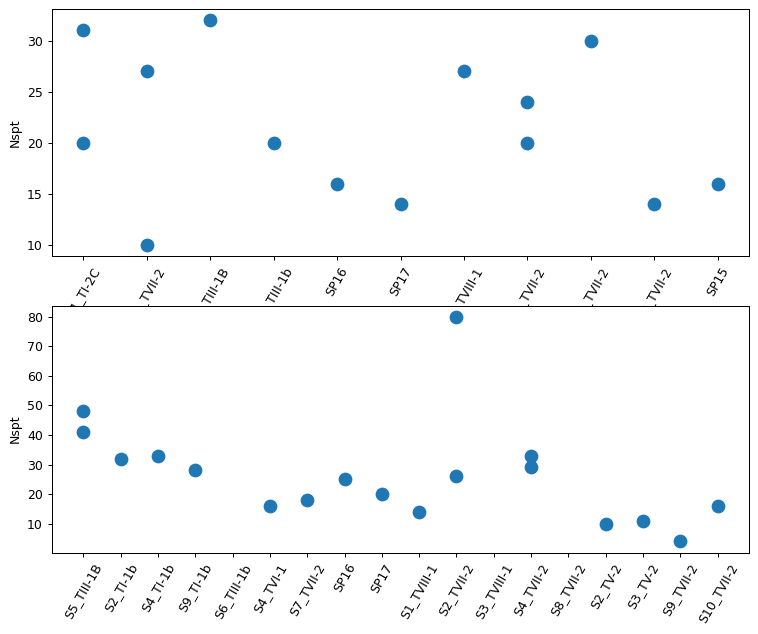

In [ ]:
fig, ax = plt.subplots(2, figsize=(10, 8),dpi= 90)
#ax[0].figure(figsize=(8,7), dpi = 100)
ax[0].scatter(dfComplete["Code"],dfComplete["Nspt"], s = 100)
ax[0].tick_params(axis='x', rotation=60)
ax[0].set_ylabel("Nspt")

ax[1].scatter(dfMiss["Code"],dfMiss["Nspt"], s = 100)
ax[1].tick_params(axis='x', rotation=60)
ax[1].set_ylabel("Nspt")

### PLOT2_Cohession Vs Location for missing data and Complete data

Text(0, 0.5, 'Cu')

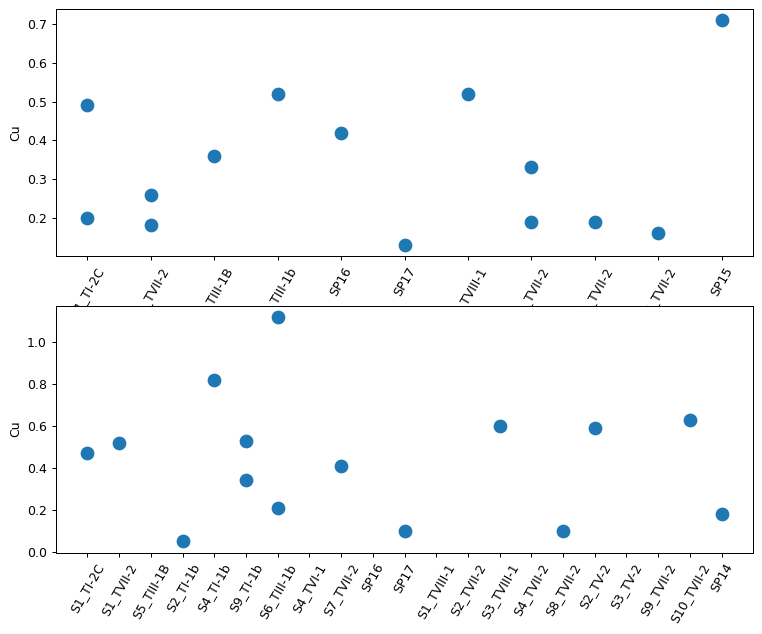

In [ ]:
fig, ax = plt.subplots(2, figsize=(10, 8),dpi= 90)
#ax[0].figure(figsize=(8,7), dpi = 100)
ax[0].scatter(dfComplete["Code"],dfComplete["Cu"], s = 100)
ax[0].tick_params(axis='x', rotation=60)
ax[0].set_ylabel("Cu")

ax[1].scatter(dfMiss["Code"],dfMiss["Cu"], s = 100)
ax[1].tick_params(axis='x', rotation=60)
ax[1].set_ylabel("Cu")

### PLOT3_SPT Vs Location for complete data_14 Points

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfComplete['Code'],
                                y=dfComplete['Nspt'],
                                mode='markers',
                                marker_color=dfComplete['Nspt'],
                                text=dfComplete['Cu'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Nspt in Seville for Selected data',xaxis_title="Location",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

### PLOT4_SPT Vs Location for all data 55 Points

In [ ]:
fig = go.Figure(data=go.Scatter(x=df1['Code'],
                                y=df1['Nspt'],
                                mode='markers',
                                marker_color=df1['Nspt'],
                                text=df1['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Nspt in Seville for All data(55)',xaxis_title="Location",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

### PLOT5_Cohession Vs Location for complete data_14 Points

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfComplete['Code'],
                                y=dfComplete['Cu'],
                                mode='markers',
                                marker_color=dfComplete['Cu'],
                                text=dfComplete['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Cohession in Seville for Selected data',xaxis_title="Location",
                   yaxis_title="Cohession",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

### PLOT6_Cohession Vs Location for all data_55 Points

In [ ]:
fig = go.Figure(data=go.Scatter(x=df1['Code'],
                                y=df1['Cu'],
                                mode='markers',
                                marker_color=df1['Cu'],
                                text=df1['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Cohession in Seville for All data(55)',xaxis_title="Location",
                   yaxis_title="Cohession",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

### PLOT7_Friction Angle Vs Location for complete data_14 Points

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfComplete['Code'],
                                y=dfComplete['Phi'],
                                mode='markers',
                                marker_color=dfComplete['Phi'],
                                text=dfComplete['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Friction angle in Seville for Selected data',xaxis_title="Location",
                   yaxis_title="Friction angle",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

### PLOT8_Friction Angle Vs Location for All data_55 Points

In [ ]:
fig = go.Figure(data=go.Scatter(x=df1['Code'],
                                y=df1['Phi'],
                                mode='markers',
                                marker_color=df1['Phi'],
                                text=df1['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Location Vs Friction angle in Seville for All data(55)',xaxis_title="Location",
                   yaxis_title="Friction angle",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

### PLOT9_SPT Vs Cohession based on Location for complete data_14 Points

In [ ]:
fig = go.Figure(data=go.Scatter(x=dfComplete['Cu'],
                                y=dfComplete['Nspt'],
                                mode='markers',
                                marker_color=dfComplete['Nspt'],
                                text=dfComplete['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Cu Vs Nspt in Seville for Selected data',xaxis_title="Cohession",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

### PLOT10_SPT Vs Cohession based on Location for All data_55 Points

In [ ]:
fig = go.Figure(data=go.Scatter(x=df1['Cu'],
                                y=df1['Nspt'],
                                mode='markers',
                                marker_color=df1['Phi'],
                                text=df1['Code'])) # hover text goes here
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Cu and Phi Vs Nspt in Seville for All data(55)',xaxis_title="Cohession",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=18,
                  color="RebeccaPurple"
                  ))
fig.show()

### PLOT11_SPT Vs Cohession based on Location for complete data_14 Points_3DPlot

In [ ]:
fig = go.Figure(data=go.Scatter3d(x=dfComplete['Cu'],
                                y=dfComplete['Nspt'],
                                z =dfComplete['Code'], 
                                mode='markers',
                                marker_color=dfComplete['Nspt'],
                                text=dfComplete['Code']))
fig.update_traces(marker=dict(size=8,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(title='Cu Vs Nspt in Seville for Complete data',xaxis_title="Cohession",
                   yaxis_title="NSPT",
                  font=dict(
                  family="Courier New, monospace",
                  size=10,
                  color="RebeccaPurple"
                  ))
fig.show()

# Distribution of data

In [ ]:
df1.iloc[:,[4,-1,-2,-3]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1 to 130
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Density    29 non-null     float64
 1   Longitude  55 non-null     float64
 2   Latitude   55 non-null     float64
 3   Address    55 non-null     object 
dtypes: float64(3), object(1)
memory usage: 2.1+ KB


### Descriptive statistics_55 Data

In [ ]:
df1.iloc[:,[4,-1,-2,-3]].describe().applymap('{:,.2f}'.format)

,Density,Nspt,Phi,Cu
count,29.00,32.00,29.00,29.00
mean,1.94,24.53,23.36,0.39
std,0.23,13.97,7.27,0.25
min,0.85,4.00,3.50,0.05
25%,1.90,16.00,20.03,0.19
50%,1.97,22.00,23.64,0.36
75%,2.02,30.25,27.80,0.52
max,2.16,80.00,33.53,1.12


### Descriptive statistics_14 Data

In [ ]:
dfComplete.iloc[:,[4,-4,-5,-6]].describe().applymap('{:,.2f}'.format)

,Density,Nspt,Phi,Cu
count,12.00,14.00,14.00,14.00
mean,1.99,21.50,25.38,0.33
std,0.09,7.08,4.80,0.18
min,1.82,10.00,17.89,0.13
25%,1.94,16.00,22.41,0.19
50%,2.00,20.00,24.10,0.30
75%,2.03,27.00,29.65,0.47
max,2.16,32.00,32.59,0.71


### Descriptive statistics_OneMissData

In [ ]:
dfMiss.iloc[:,[4,-4,-5,-6]].describe().applymap('{:,.2f}'.format)

,Density,Nspt,Phi,Cu
count,17.00,18.00,15.00,15.00
mean,1.90,26.89,21.48,0.44
std,0.28,17.44,8.74,0.30
min,0.85,4.00,3.50,0.05
25%,1.89,16.00,14.76,0.20
50%,1.96,25.50,23.14,0.47
75%,2.02,32.75,27.51,0.59
max,2.15,80.00,33.53,1.12


## Box plot for disturbation 


### Density Box PLot

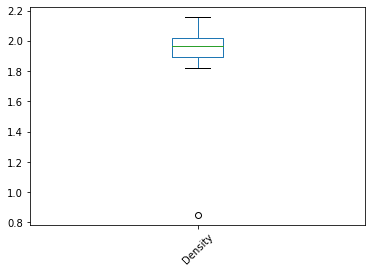

In [ ]:
boxPlotDen = df1.boxplot(column=['Density'], grid=False, rot=45, fontsize=10)

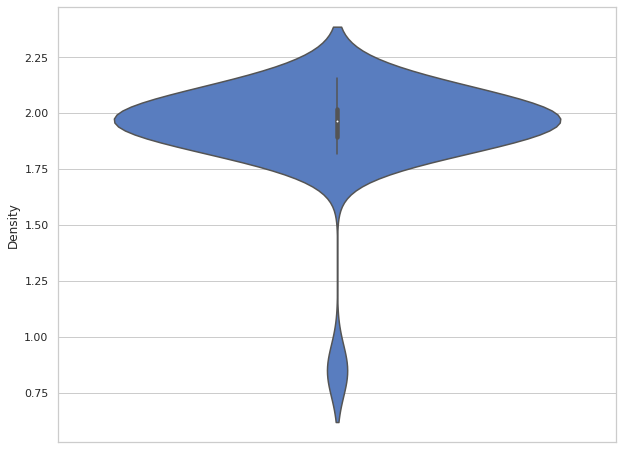

In [ ]:
sb.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sb.violinplot(y=df1["Density"], palette="muted")

This report is locted under the value, and we can see rest of report of that report does not have Density

#### Deceting outlier for Density

In [ ]:
df1[df1["Density"]<1]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
43,S4_TVI-1,4.0,4.6,Clay,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/ Americo Vespucio,37.398565,-6.010093


In [ ]:
df[df["Code"]=="S4_TVI-1"]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
42,S4_TVI-1,NaN,NaN,Filling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/ Americo Vespucio,37.398565,-6.010093
43,S4_TVI-1,4.0,4.6,Clay,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/ Americo Vespucio,37.398565,-6.010093
44,S4_TVI-1,10.0,10.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,C/ Americo Vespucio,37.398565,-6.010093
45,S4_TVI-1,18.0,18.6,Gravel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,C/ Americo Vespucio,37.398565,-6.010093


### Cohession Box PLot

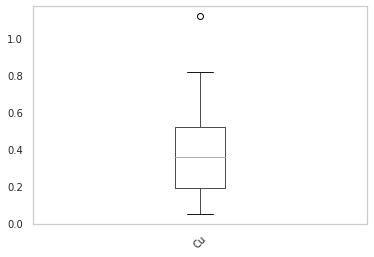

In [ ]:
boxPlotDen = df1.boxplot(column=['Cu'], grid=False, rot=45, fontsize=10)

#### Deceting outlier for Cohession

In [ ]:
df1[df1["Cu"]>1]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
37,S6_TIII-1b,10.0,10.6,Sand,1.92,NaN,1.12,16.99,NaN,NaN,1.12,16.99,NaN,Renfe/Kansas City/Tesalonica,37.401742,-5.963096


**Note:** One time the Cohession for sand is reported 1.12 and another time is reported 0.52. We have to consider this change.

In [ ]:
df[df["Code"]=="S6_TIII-1b"]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
35,S6_TIII-1b,6.0,6.60,Filling,2.14,NaN,1.08,6.25,NaN,NaN,1.08,6.25,NaN,Renfe/Kansas City/Tesalonica,37.401742,-5.963096
36,S6_TIII-1b,8.0,8.60,Clay,1.96,NaN,0.21,31.10,NaN,NaN,0.21,31.10,NaN,Renfe/Kansas City/Tesalonica,37.401742,-5.963096
37,S6_TIII-1b,10.0,10.60,Sand,1.92,NaN,1.12,16.99,NaN,NaN,1.12,16.99,NaN,Renfe/Kansas City/Tesalonica,37.401742,-5.963096
38,S6_TIII-1b,12.0,12.60,Sand,NaN,NaN,0.52,31.93,NaN,NaN,0.52,31.93,20.0,Renfe/Kansas City/Tesalonica,37.401742,-5.963096
39,S6_TIII-1b,14.0,14.65,Gravel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,Renfe/Kansas City/Tesalonica,37.401742,-5.963096
40,S6_TIII-1b,18.0,18.60,Marl,2.02,NaN,0.52,31.93,NaN,NaN,0.52,31.93,NaN,Renfe/Kansas City/Tesalonica,37.401742,-5.963096
41,S6_TIII-1b,22.0,22.60,Marl,NaN,3.46,NaN,NaN,0.36,21.6,0.36,21.60,NaN,Renfe/Kansas City/Tesalonica,37.401742,-5.963096


### Nspt Box PLot

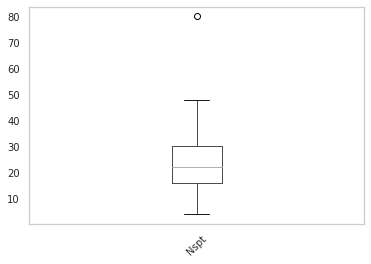

In [ ]:
boxPlotDen = df1.boxplot(column=['Nspt'], grid=False, rot=45, fontsize=10)

#### Deceting outlier for Nspt

**Note:** This Nspt is reported in the 20m depth and we have two SPT number for sand too, which they have had lower. 

In [ ]:
df1[df1["Nspt"]>70]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
76,S2_TVII-2,20.0,20.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,Ronda Triana,37.386229,-6.011196


In [ ]:
df[df["Code"]=="S2_TVII-2"]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
72,S2_TVII-2,2.0,2.6,Filling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ronda Triana,37.386229,-6.011196
73,S2_TVII-2,4.0,4.6,Clay,2.006,NaN,0.33,23.78,NaN,NaN,0.33,23.78,20.0,Ronda Triana,37.386229,-6.011196
74,S2_TVII-2,10.0,10.6,Sand,1.895,NaN,0.19,27.68,NaN,NaN,0.19,27.68,24.0,Ronda Triana,37.386229,-6.011196
75,S2_TVII-2,17.0,17.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,Ronda Triana,37.386229,-6.011196
76,S2_TVII-2,20.0,20.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,Ronda Triana,37.386229,-6.011196
77,S2_TVII-2,26.5,27.1,Marl,2.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ronda Triana,37.386229,-6.011196
78,S2_TVII-2,31.7,32.3,Marl,1.937,NaN,0.55,24.32,NaN,NaN,0.55,24.32,NaN,Ronda Triana,37.386229,-6.011196
79,S2_TVII-2,35.0,35.6,Marl,2.007,NaN,0.18,24372.00,NaN,NaN,0.18,24372.00,NaN,Ronda Triana,37.386229,-6.011196


### Friction angle Box PLot

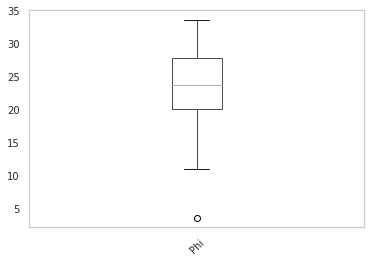

In [ ]:
boxPlotDen = df1.boxplot(column=['Phi'], grid=False, rot=45, fontsize=10)

#### Deceting outlier for friction angle

In [ ]:
df1[df1["Phi"]<10]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
119,S10_TVII-2,4.0,4.6,Clay,1.9,NaN,0.63,3.5,NaN,NaN,0.63,3.5,NaN,Lopez de Gomara,37.38021,-6.008791


In [ ]:
df[df["Code"]=="S10_TVII-2"]

,Code,DepthUp,DepthDown,Soil,Density,qu,Cu_directshear,Phi_directshear,Cu_triaxial,Phi_triaxial,Cu,Phi,Nspt,Address,Latitude,Longitude
118,S10_TVII-2,2.0,2.6,Filling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lopez de Gomara,37.38021,-6.008791
119,S10_TVII-2,4.0,4.6,Clay,1.9,NaN,0.63,3.50,NaN,NaN,0.63,3.50,NaN,Lopez de Gomara,37.38021,-6.008791
120,S10_TVII-2,7.0,7.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,Lopez de Gomara,37.38021,-6.008791
121,S10_TVII-2,10.0,10.6,Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lopez de Gomara,37.38021,-6.008791
122,S10_TVII-2,19.0,19.6,Marl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lopez de Gomara,37.38021,-6.008791
123,S10_TVII-2,26.0,26.6,Marl,NaN,NaN,1.37,26.17,NaN,NaN,1.37,26.17,NaN,Lopez de Gomara,37.38021,-6.008791


#### Conclusion of Outlier
***Note: So Based on the previous reports it is concluded,  we can remove 37 and 76 from dataset***

In [ ]:
dfComplete.iloc[:,[0,3,4,10,11,12]]

,Code,Soil,Density,Cu,Phi,Nspt
1,S1_TI-2C,Clay,1.818,0.49,23.00,20.0
2,S1_TI-2C,Sand,2.006,0.20,30.31,31.0
6,S1_TVII-2,Clay,2.156,0.18,23.64,10.0
8,S1_TVII-2,Sand,1.875,0.26,24.42,27.0
14,S5_TIII-1B,Clay,1.965,0.36,25.46,32.0
38,S6_TIII-1b,Sand,NaN,0.52,31.93,20.0
53,SP16,Clay,1.960,0.42,20.39,16.0
61,SP17,Clay,NaN,0.13,20.03,14.0
68,S1_TVIII-1,Sand,1.993,0.52,17.89,27.0
73,S2_TVII-2,Clay,2.006,0.33,23.78,20.0


## Matrix Scatter Plot

### Matrix Scatter Plot_14Data

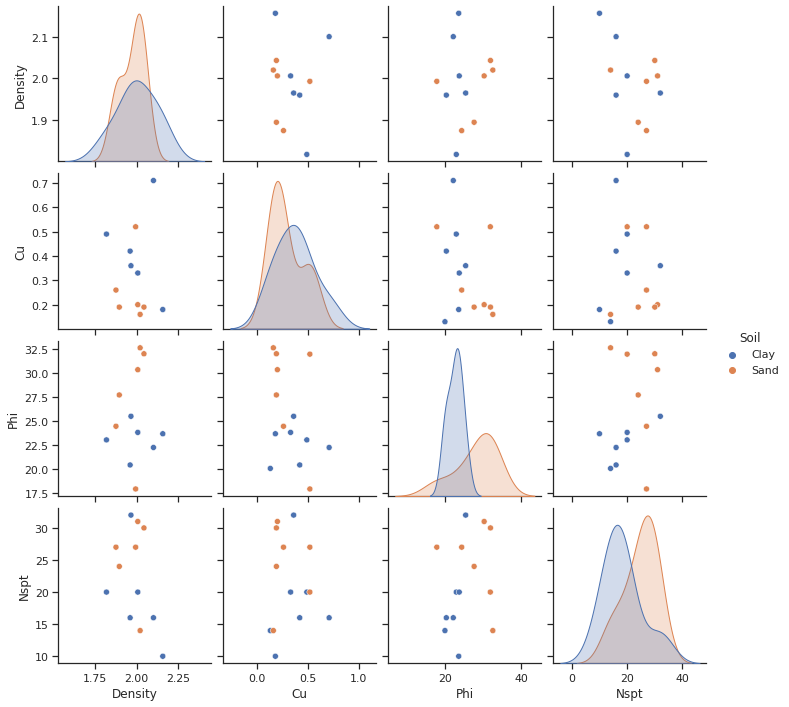

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sb.set_theme(style="ticks", rc=custom_params)
sb.pairplot(dfComplete.iloc[:,[0,3,4,10,11,12]], hue="Soil")

### Matrix Scatter Plot_55Data

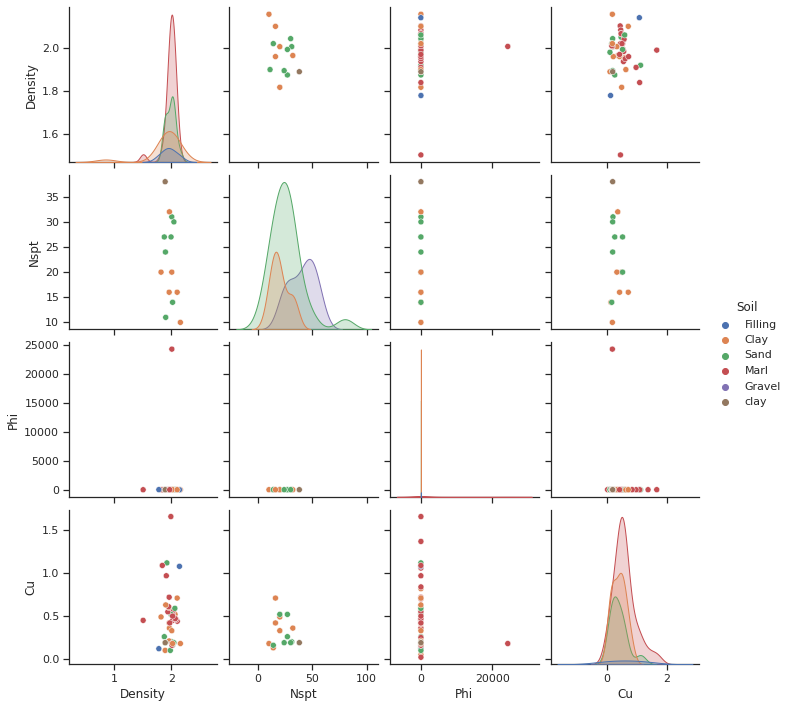

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sb.set_theme(style="ticks", rc=custom_params)
sb.pairplot(df.iloc[:,[0,3,4,-4,-5,-6]], hue="Soil")

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 617 kB/s 


In [ ]:
import sweetviz as sv

In [ ]:
my_report = sv.analyze(df.iloc[:,[0,3,4,-4,-5,-6]])
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
my_report = sv.analyze(dfComplete.iloc[:,[0,3,4,10,11,12]])
my_report.show_html("ClaySand")

                                             |          | [  0%]   00:00 -> (? left)

Report ClaySand was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Drawing map

## For Complete dataset 14 points

In [ ]:
import folium
from folium import plugins
%matplotlib inline
import branca

In [ ]:
drawingCom = dfComplete.iloc[:,[0,3,4,10,11,12,-1,-2,-3]]
drawingCom.head(2)

,Code,Soil,Density,Cu,Phi,Nspt,Longitude,Latitude,Address
1,S1_TI-2C,Clay,1.818,0.49,23.00,20.0,-5.988427,37.36079,Av. Reina Mercedes
2,S1_TI-2C,Sand,2.006,0.20,30.31,31.0,-5.988427,37.36079,Av. Reina Mercedes


Around map and points

In [ ]:
map14PSimple = folium.Map(location=[drawingCom.Latitude.mean(), drawingCom.Longitude.mean()], zoom_start=14, control_scale=True)

In [ ]:
for i in range(0,len(drawingCom)):
    numSoil = drawingCom['Soil'].iloc[i]
    if numSoil == "Clay":
        color = 'blue'
    elif numSoil == "Sand":
        color = 'green'
    else:
        color = 'red'
    popup = "Nspt: "+str(drawingCom['Nspt'].iloc[i])+"\nCu: "+ str(drawingCom['Cu'].iloc[i])
    folium.Marker([drawingCom['Latitude'].iloc[i],
                   drawingCom['Longitude'].iloc[i]],popup=popup,
                  icon=folium.Icon(color=color,
                                   icon='info-sign'),tooltip=location_info["Code"]).add_to(map14PSimple)

map14PSimple

### For Complete dataset 14 points WITH Detail

In [ ]:
def fancy_html(row):
    i = row
    
    NSPT = drawingCom['Nspt'].iloc[i]                             
    friA = drawingCom['Phi'].iloc[i]                           
    coh = drawingCom['Cu'].iloc[i]
    dens = drawingCom['Density'].iloc[i]                                           
    soilM = drawingCom['Soil'].iloc[i]                               
    codeName = drawingCom['Code'].iloc[i]                             
    Add = drawingCom['Address'].iloc[i]
    
    left_col_colour = "#2A799C"
    right_col_colour = "#C5DCE7"
    
    html = """<!DOCTYPE html>
<html>

<head>
<h4 style="margin-bottom:0"; width="300px">{}</h4>""".format(codeName) + """

</head>
    <table style="height: 126px; width: 300px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Number of SPT</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(NSPT) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Cohession</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(coh) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Friction angle</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(friA) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Density</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(dens) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Soil type</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(soilM) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Address</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Add) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

In [ ]:
location = drawingCom['Latitude'].mean(), drawingCom['Longitude'].mean()
map14PAdv = folium.Map(location=location,zoom_start=15,min_zoom=5)

for i in range(0,len(drawingCom)):
    html = fancy_html(i)
 
    iframe = branca.element.IFrame(html=html,width=310,height=220)
    popup = folium.Popup(iframe,parse_html=True)
    
    folium.Marker([drawingCom['Latitude'].iloc[i],drawingCom['Longitude'].iloc[i]],
                  popup=popup,icon=folium.Icon(color=color, icon='info-sign')).add_to(map14PAdv)


In [ ]:
map14PAdv

## For Sand and Clay 55 point

In [ ]:
drawingClaySand = df1.iloc[:,[0,3,4,-4,-5,-6,-1,-2,-3]]

In [ ]:
drawingClaySand['Soil'].value_counts()

Sand    34
Clay    21
Name: Soil, dtype: int64

In [ ]:
location = drawingClaySand['Latitude'].mean(), drawingClaySand['Longitude'].mean()
map55PSimple = folium.Map(location=location,zoom_start=15)

#The num of Soil
for i in range(0,len(drawingClaySand)):
    numSoil = drawingClaySand['Soil'].iloc[i]
    if numSoil == "Clay":
        color = 'blue'
    elif numSoil == "Sand":
        color = 'green'
    else:
        color = 'red'
    popup = "Nspt: "+str(drawingClaySand['Nspt'].iloc[i])+"\nCu: "+ str(drawingClaySand['Cu'].iloc[i])
    folium.Marker([drawingClaySand['Latitude'].iloc[i],
                   drawingClaySand['Longitude'].iloc[i]],popup=popup,
                  icon=folium.Icon(color=color,
                                   icon='info-sign'),tooltip=location_info["Code"]).add_to(map55PSimple)

map55PSimple

### For Sand and Clay 55 Point WITH Detail

In [ ]:
def fancy_html(row):
    i = row
    
    NSPT = drawingClaySand['Nspt'].iloc[i]                             
    friA = drawingClaySand['Phi'].iloc[i]                           
    coh = drawingClaySand['Cu'].iloc[i]
    dens = drawingClaySand['Density'].iloc[i]                                           
    soilM = drawingClaySand['Soil'].iloc[i]                               
    codeName = drawingClaySand['Code'].iloc[i]                             
    Add = drawingClaySand['Address'].iloc[i]
    
    left_col_colour = "#2A799C"
    right_col_colour = "#C5DCE7"
    
    html = """<!DOCTYPE html>
<html>

<head>
<h4 style="margin-bottom:0"; width="300px">{}</h4>""".format(codeName) + """

</head>
    <table style="height: 126px; width: 300px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Number of SPT</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(NSPT) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Cohession</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(coh) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Friction angle</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(friA) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Density</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(dens) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Soil type</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(soilM) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Address</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Add) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

In [ ]:
location = drawingClaySand['Latitude'].mean(), drawingClaySand['Longitude'].mean()
map55PAdv = folium.Map(location=location,zoom_start=15,min_zoom=5)

for i in range(0,len(drawingClaySand)):
    html = fancy_html(i)
 
    iframe = branca.element.IFrame(html=html,width=310,height=220)
    popup = folium.Popup(iframe,parse_html=True)
    
    folium.Marker([drawingClaySand['Latitude'].iloc[i],drawingClaySand['Longitude'].iloc[i]],
                  popup=popup,icon=folium.Icon(color=color, icon='info-sign')).add_to(map55PAdv)



In [ ]:
map55PAdv

## For All layers WITH Detail_133Point

In [ ]:
drawingAll = df.iloc[:,[0,3,4,-4,-5,-6,-1,-2,-3]]

In [ ]:
def fancy_html(row):
    i = row
    
    NSPT = drawingAll['Nspt'].iloc[i]                             
    friA = drawingAll['Phi'].iloc[i]                           
    coh = drawingAll['Cu'].iloc[i]
    dens = drawingAll['Density'].iloc[i]                                           
    soilM = drawingAll['Soil'].iloc[i]                               
    codeName = drawingAll['Code'].iloc[i]                             
    Add = drawingAll['Address'].iloc[i]
    
    left_col_colour = "#2A799C"
    right_col_colour = "#C5DCE7"
    
    html = """<!DOCTYPE html>
<html>

<head>
<h4 style="margin-bottom:0"; width="300px">{}</h4>""".format(codeName) + """

</head>
    <table style="height: 126px; width: 300px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Number of SPT</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(NSPT) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Cohession</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(coh) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Friction angle</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(friA) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Density</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(dens) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Soil type</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(soilM) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Address</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Add) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

In [ ]:
drawingAll[drawingAll["Latitude"].isnull()]

,Code,Soil,Density,Nspt,Phi,Cu,Longitude,Latitude,Address


In [ ]:
location = drawingAll['Latitude'].mean(), drawingAll['Longitude'].mean()
map133PAdv = folium.Map(location=location,zoom_start=15,min_zoom=5)

for i in range(0,len(drawingAll)):
    html = fancy_html(i)
 
    iframe = branca.element.IFrame(html=html,width=310,height=220)
    popup = folium.Popup(iframe,parse_html=True)
    
    folium.Marker([drawingAll['Latitude'].iloc[i],drawingAll['Longitude'].iloc[i]],
                  popup=popup,icon=folium.Icon(color=color, icon='info-sign')).add_to(map133PAdv)


In [ ]:
map133PAdv

In [ ]:
BasicPath = "/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/mapAndReports/"
map133PAdv.save(BasicPath+"mapAdv133P.html")
map14PSimple.save(BasicPath+"mapSimple14P.html")
map55PSimple.save(BasicPath+"mapSimple55P.html")
map55PAdv.save(BasicPath+"mapAdv55P.html")
map14PAdv.save(BasicPath+"mapAdv14P.html")
